In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer


In [2]:
df1 = pd.read_csv('calories.csv')
print(df1.head())

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


In [3]:
print(df1.info())
print(df1.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB
None
            count          mean           std         min          25%  \
User_ID   15000.0  1.497736e+07  2.872851e+06  10001159.0  12474190.75   
Calories  15000.0  8.953953e+01  6.245698e+01         1.0        35.00   

                 50%          75%         max  
User_ID   14997285.0  17449278.75  19999647.0  
Calories        79.0       138.00       314.0  


In [4]:
df2 = pd.read_csv('exercise.csv')
print(df1.head())
print(df1.info())

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB
None


In [5]:
df = pd.merge(df1, df2, on='User_ID', how='inner')
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


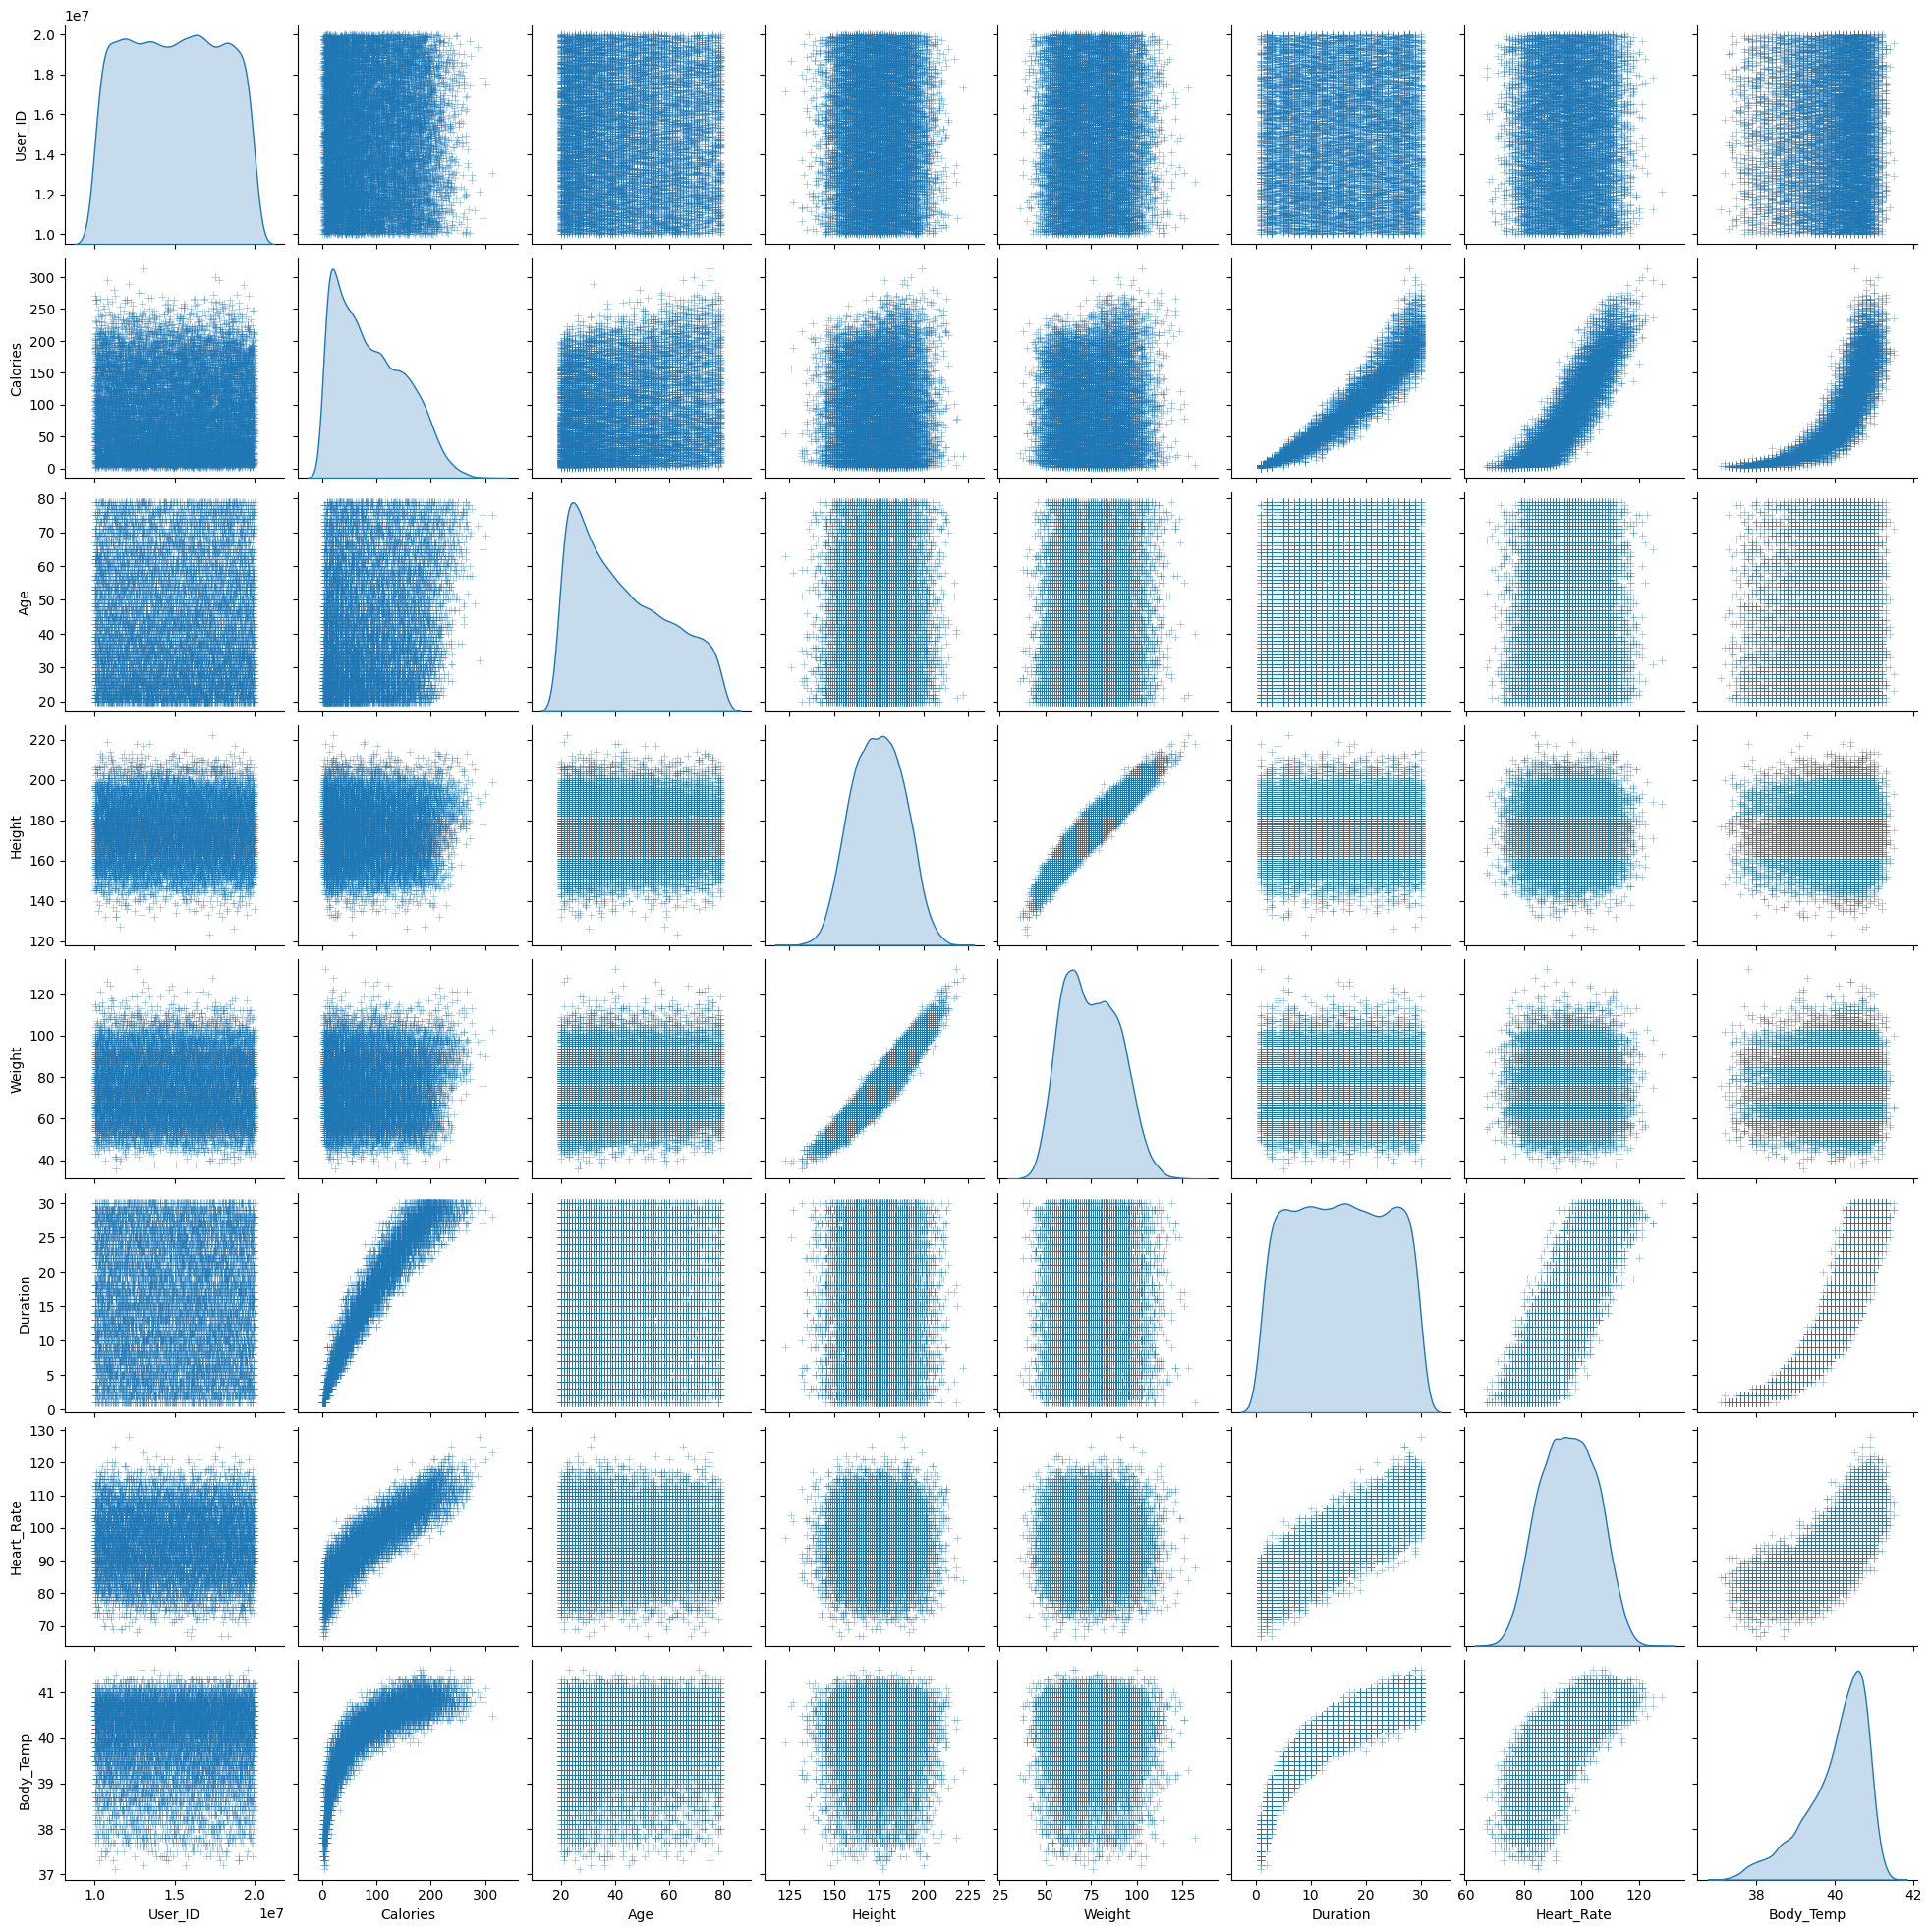

In [6]:
sns.pairplot(df, diag_kind='kde', markers='+', plot_kws={'alpha':0.5})
plt.show()

In [7]:
data_encoder = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [8]:
X = data_encoder.drop(columns=['Calories', 'User_ID'])
y = data_encoder['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [10]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [12]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
predictions = model.predict(X_test_poly)

In [14]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Model Performance on Test Data")
print("-" * 40)
print(f"Mean Squared Error (MSE):      {mse:.4f}")
print(f"Mean Absolute Error (MAE):     {mae:.4f}")
print(f"R² Score:                      {r2:.4f}  ({r2*100:.2f}%)")

Model Performance on Test Data
----------------------------------------
Mean Squared Error (MSE):      9.2205
Mean Absolute Error (MAE):     2.2502
R² Score:                      0.9977  (99.77%)


In [15]:
train_pred = model.predict(X_train_poly)
train_r2 = r2_score(y_train, train_pred)

print("\nModel Generalization Check")
print("-" * 40)
print(f"Train R² Score:                {train_r2:.4f}")         
print(f"Test R² Score:                 {r2:.4f}")


Model Generalization Check
----------------------------------------
Train R² Score:                0.9977
Test R² Score:                 0.9977


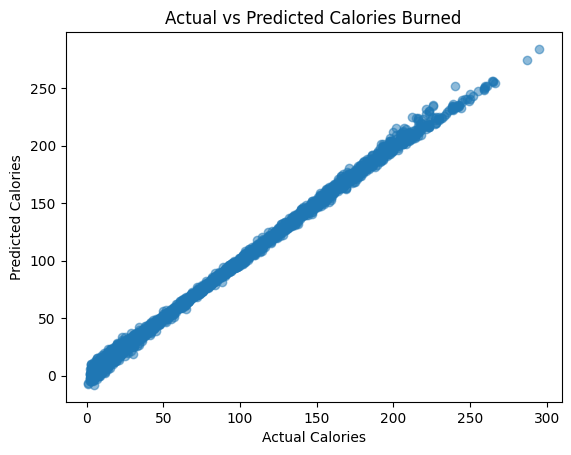

In [16]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories Burned')
plt.show()

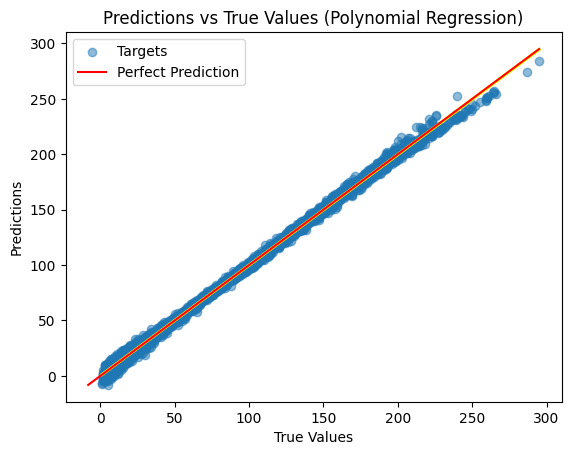

In [17]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.5}, line_kws={'color':'yellow'}, label='Targets')
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], c="red", label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values (Polynomial Regression)')
plt.legend()
plt.show()


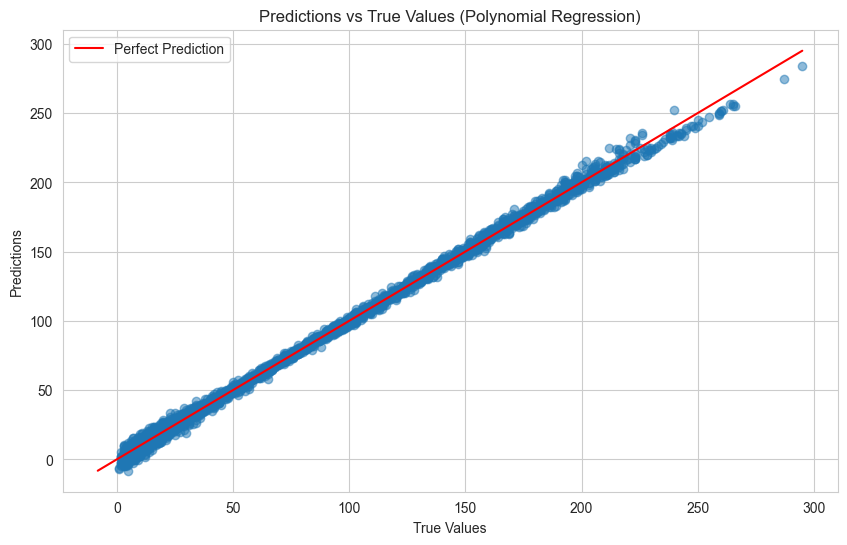

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min_val, max_val], [min_val, max_val], c="red", label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values (Polynomial Regression)')
plt.legend()
plt.show()

In [19]:
## Test
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [20]:
testing_calories = pd.DataFrame({
    'Gender':['male'], 
    'Age':[68],
    'Height':[190.0],
    'Weight':[94.0],
    'Duration':[29.0],
    'Heart_Rate':[105.0],
    'Body_Temp':[40.8]
})

In [21]:
# One-hot encode like training data
testing_calories_encoded = pd.get_dummies(testing_calories, columns=['Gender'], drop_first=True)

for col in X.columns:
    if col not in testing_calories_encoded.columns:
        testing_calories_encoded[col] = 0

# Ensure same column order as training data
testing_calories_encoded = testing_calories_encoded[X.columns]

# Transform and scale
testing_calories_scaled = scaler.transform(imputer.transform(testing_calories_encoded))
testing_calories_poly = poly.transform(testing_calories_scaled)

# Predict
predicted_calories = model.predict(testing_calories_poly)
print(f"Predicted Calories burned: {predicted_calories[0]:.0f}")

Predicted Calories burned: 196


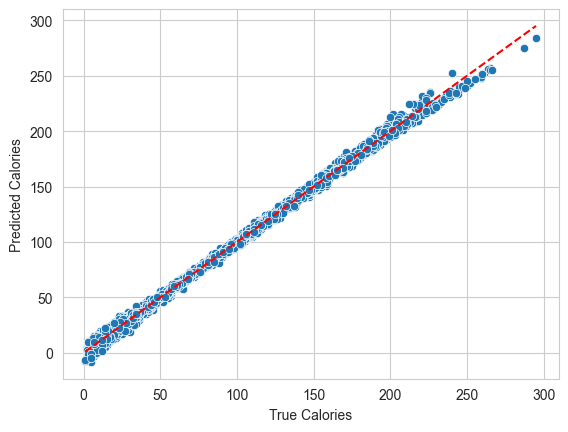

In [22]:
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Calories")
plt.ylabel("Predicted Calories")
plt.show()


In [24]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
lower = predicted_calories - rmse
upper = predicted_calories + rmse
print(f"Expected calories burned range: calories {lower[0]:,.0f} - calories {upper[0]:,.0f}")


Expected calories burned range: calories 193 - calories 199
